O Erro médio quadrático (EMQ) = %.4f [1.55973245e-35]


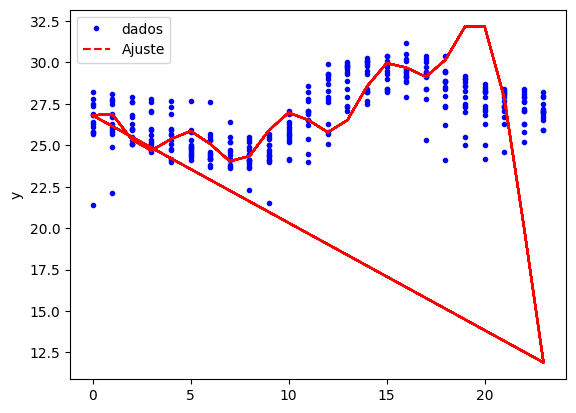

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

# Lê a folha chamada 'Planilha1'
#dataFrame = pd.read_excel('./drive/MyDrive/CN/ProjetoCN/Dados/teste.xlsx',sheet_name='Página1')
dataFrame = pd.read_excel('./drive/MyDrive/CN/Prática unidade2/CopiadeDadosNatal.xlsx',sheet_name='Página1')

n_neuronios = 5
t = dataFrame.iloc[:,5].to_numpy()
yt = np.array([dataFrame.iloc[:,4]])
ytt = dataFrame.iloc[:,4].to_numpy()
c1 = np.linspace(t[0],t[332],n_neuronios)


phi = np.zeros((len(t),len(c1)))

sig = np.std(t, ddof=1) /np.sqrt(2 * n_neuronios)


for i in range(len(phi)):
  for j in range(len(phi[i])):
    phi[i][j] = np.exp((-1/ (2* sig**2) )*pow((t[i]-c1[j]),2))



w = np.linalg.pinv(phi.T @ phi) @ (phi.T@yt.T)

fx = (phi)@w

'''
fx = lambda x: (w[0][0]* np.exp((-1/ (2* sig**2) )*pow((x-c[0]),2)) +
                w[1][0]* np.exp((-1/ (2* sig**2) )*pow((x-c[1]),2)) +
                w[2][0]* np.exp((-1/ (2* sig**2) )*pow((x-c[2]),2)) +
                w[3][0]* np.exp((-1/ (2* sig**2) )*pow((x-c[3]),2)) +
                w[4][0]* np.exp((-1/ (2* sig**2) )*pow((x-c[4]),2)))

'''





EMQ = ((1/len(t))*(sum((yt.T - fx)**2)))/1e+36
print(f"O Erro médio quadrático (EMQ) = %.4f {EMQ}")

plt.plot(t,ytt,"b.", label = "dados")

plt.plot(t,fx,"--r", label = "Ajuste")
plt.ylabel("y")
plt.legend()
plt.show()


    Hora UTC  TEMPERATURA DO AR - BULBO SECO, HORARIA (�C)
0          0                                          25.8
1          1                                          25.9
2          2                                          25.5
3          3                                          25.3
4          4                                          26.0
5          5                                          24.6
6          6                                          24.5
7          7                                          24.4
8          8                                          24.1
9          9                                          24.3
10        10                                          25.8
11        11                                          28.6
12        12                                          29.2
13        13                                          29.6
14        14                                          29.9
15        15                                          29

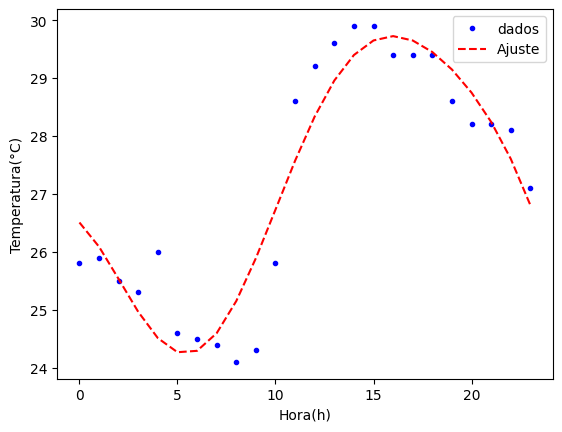

In [33]:
import numpy as np
import pandas as pd
import numpy.linalg as la
dataFrame = pd.read_excel('./drive/MyDrive/CN/Prática unidade2/CopiadeDadosNatal.xlsx',sheet_name='Página1')

print(dataFrame)


h = dataFrame.iloc[:,0].to_numpy()
t = np.array([dataFrame.iloc[:,1].to_numpy()])
t1 = dataFrame.iloc[:,1].to_numpy()
c1 = np.linspace(h.min(), h.max(), 5)  # Ajuste os limites conforme necessário

sig = np.std(h,ddof=1)

phi = np.zeros((len(h),len(c1)))



for i in range(len(phi)):
  for j in range(len(c1)):
    phi[i][j] = np.exp((-1 / (2 * sig ** 2)) * pow((h[i] - c1[j]), 2))


w = np.linalg.pinv(phi.T @ phi) @ (phi.T@t.T)
#w = np.dot(la.pinv(phi),t.T)



fx = (phi)@w


EMQ = ((1/len(h))*(np.sum((t.T - fx)**2)))
print(f"O Erro médio quadrático (EMQ) = {EMQ}")



plt.plot(h,t1,"b.", label = "dados")
plt.plot(h,fx,"--r", label = "Ajuste")
plt.xlabel("Hora(h)")
plt.ylabel("Temperatura(°C)")
plt.legend()

plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

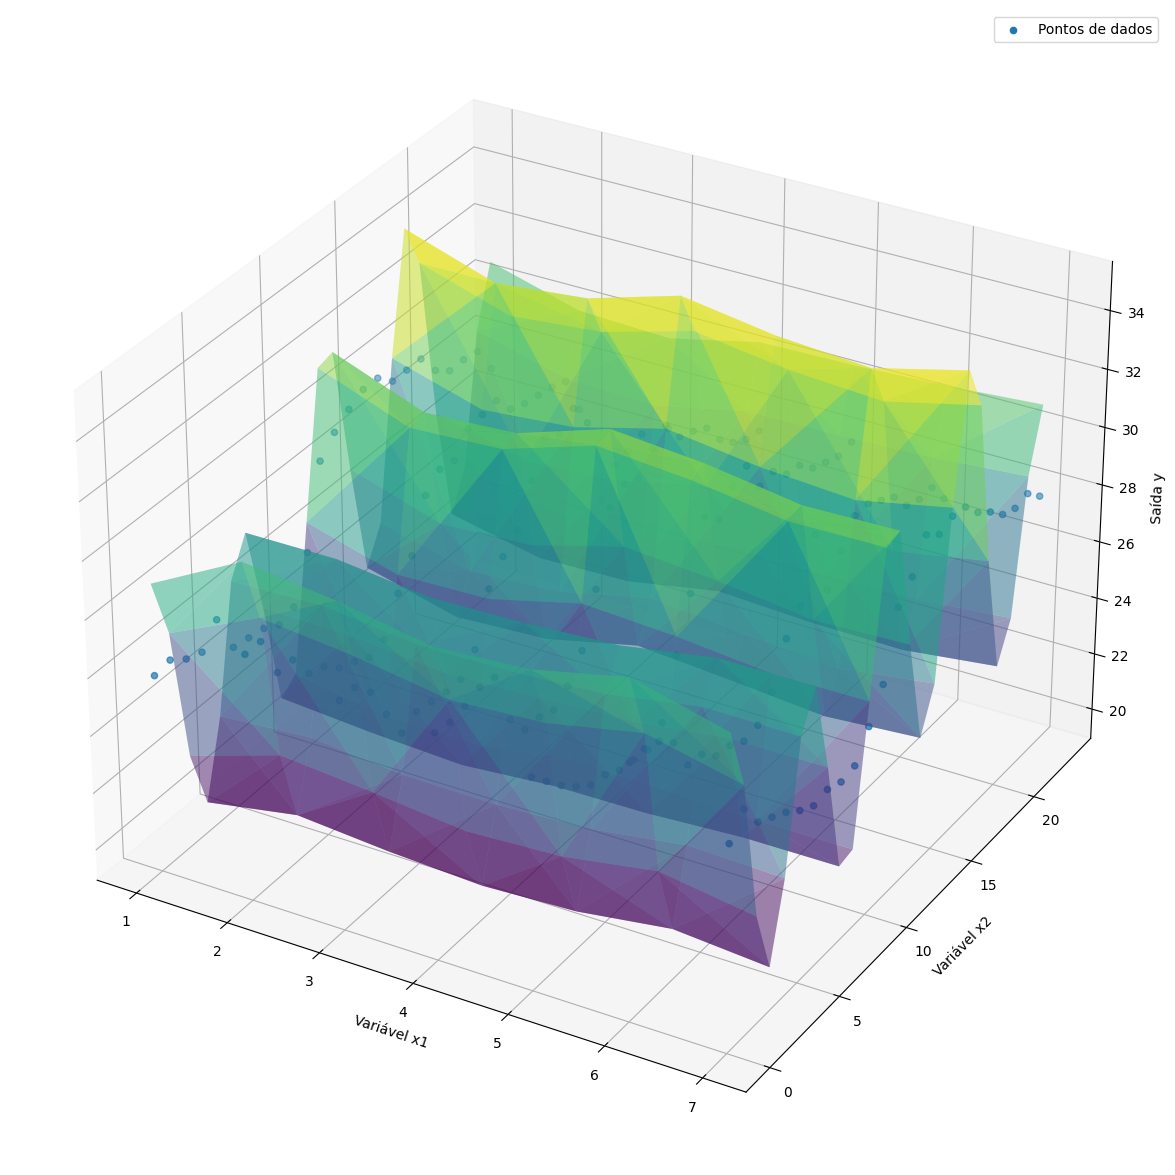

In [54]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Leitura do DataFrame
dataFrame = pd.read_excel('./drive/MyDrive/CN/Prática unidade2/CopiadeDadosNatal(1).xlsx', sheet_name='Página1')

# Geração de dados
x1 = dataFrame.iloc[:, 0]  # Variável x1
x2 = dataFrame.iloc[:, 1]  # Variável x2
y = dataFrame.iloc[:, 2]

# Ajuste dos limites das variáveis c1 e c2
c1 = np.linspace(x1.min(), x1.max(), 5)
c2 = np.linspace(x2.min(), x2.max(), 5)

# Construção da matriz de funções de base radial (RBF)
phi = np.zeros((len(x1), len(c1) * len(c2)))

# Definindo o parâmetro de largura da RBF
sig = np.std(x1, ddof=1)

# Calculando as funções de base radial
for i in range(len(x1)):
    for j in range(len(c1)):
        for k in range(len(c2)):
            idx = j * len(c2) + k
            phi[i][idx] = np.exp(
                (-1 / (2 * sig ** 2)) * (pow((x1.iloc[i] - c1[j]), 2) + pow((x2.iloc[i] - c2[k]), 2))
            )

# Calculando os pesos do ajuste
w = np.linalg.pinv(phi.T @ phi) @ (phi.T @ y.T)

# Calculando a curva de ajuste
fx = phi @ w

# Criando o gráfico tridimensional
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Adicionando pontos de dados
ax.scatter(x1, x2, y, label='Pontos de dados')

# Adicionando a superfície de ajuste
ax.plot_trisurf(x1, x2, fx, linewidth=0, antialiased=True, cmap='viridis', alpha=0.5)

# Adicionando rótulos aos eixos
ax.set_xlabel('Variável x1')
ax.set_ylabel('Variável x2')
ax.set_zlabel('Saída y')

# Adicionando legenda
ax.legend()

# Exibindo o gráfico
plt.show()


In [55]:
import numpy as np
import pandas as pd

# Leitura do DataFrame
dataFrame = pd.read_excel('./drive/MyDrive/CN/Prática unidade2/CopiadeDadosNatal(1).xlsx', sheet_name='Página1')

# Geração de dados
x1 = dataFrame.iloc[:, 0]  # Variável x1
x2 = dataFrame.iloc[:, 1]  # Variável x2
y = dataFrame.iloc[:, 2]

# Ajuste dos limites das variáveis c1 e c2
c1 = np.linspace(x1.min(), x1.max(), 5)
c2 = np.linspace(x2.min(), x2.max(), 5)

# Construção da matriz de funções de base radial (RBF)
phi = np.zeros((len(x1), len(c1) * len(c2)))

# Definindo o parâmetro de largura da RBF
sig = np.std(x1, ddof=1)

# Calculando as funções de base radial
for i in range(len(x1)):
    for j in range(len(c1)):
        for k in range(len(c2)):
            idx = j * len(c2) + k
            phi[i][idx] = np.exp(
                (-1 / (2 * sig ** 2)) * (pow((x1.iloc[i] - c1[j]), 2) + pow((x2.iloc[i] - c2[k]), 2))
            )

# Calculando os pesos do ajuste
w = np.linalg.pinv(phi.T @ phi) @ (phi.T @ y.T)

# Calculando a curva de ajuste para x1 = 2 e x2 = 14
x1_test = 2
x2_test = 14

# Construindo a matriz de funções de base radial para os valores de teste
phi_test = np.zeros(len(c1) * len(c2))
for j in range(len(c1)):
    for k in range(len(c2)):
        idx = j * len(c2) + k
        phi_test[idx] = np.exp((-1 / (2 * sig ** 2)) * (pow((x1_test - c1[j]), 2) + pow((x2_test - c2[k]), 2)))

# Calculando a função ajustada para os valores de teste
fx_test = phi_test @ w

print(f"Ajuste para x1 = {x1_test} e x2 = {x2_test}: {fx_test}")


Ajuste para x1 = 2 e x2 = 14: 22.749191323421623
